# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#3 Conclusions from Data Set
1. We can see as the latitude increases that the temperature decreases or gets cooler
2. As the distance from the equator increases the wind speed slowly increases
3. Humidity seems to be constant/equal across different latitudes 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
response_json = []
units = "imperial"


# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json,indent=4))

{
    "coord": {
        "lon": 15.3747,
        "lat": 44.5461
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 44.29,
        "feels_like": 41.56,
        "temp_min": 44.29,
        "temp_max": 44.29,
        "pressure": 1011,
        "humidity": 93,
        "sea_level": 1011,
        "grnd_level": 945
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.94,
        "deg": 116,
        "gust": 10.6
    },
    "clouds": {
        "all": 100
    },
    "dt": 1637552073,
    "sys": {
        "type": 1,
        "id": 6392,
        "country": "HR",
        "sunrise": 1637561056,
        "sunset": 1637594723
    },
    "timezone": 3600,
    "id": 3199873,
    "name": "Gospi\u0107",
    "cod": 200
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name). -->


In [4]:
latitude=[]
longitude=[]
temp_max=[]
humidity=[]
clouds=[]
wind_speeds=[]
countries=[]
date=[]
city_names=[]

for city in cities:
    response_json = requests.get(query_url + city).json()
#     print(json.dumps(response_json, indent = 4, sort_keys = True))
#     break
    
    try:
        city_name=response_json["name"]
        city_names.append(city)
        lati=response_json["coord"]["lat"]
        latitude.append(lati)
        long=response_json["coord"]["lon"]
        longitude.append(long)
        temperature=response_json["main"]["temp"]
        temp_max.append(temperature)
        hum=response_json["main"]["humidity"]
        humidity.append(hum)
        cld= response_json["clouds"]["all"]
        clouds.append(cld)
        wind=response_json["wind"]["speed"]
        wind_speeds.append(wind)
        cntr=response_json["sys"]["country"]
        countries.append(cntr)
        dt=response_json["dt"]
        date.append(dt)
        print(f"{city} is on the list.")
        
        
    except(KeyError,IndexError):
        print("The record does not exist")


albany is on the list.
tateyama is on the list.
kavaratti is on the list.
avarua is on the list.
quesnel is on the list.
chokurdakh is on the list.
constitucion is on the list.
killybegs is on the list.
mataura is on the list.
mar del plata is on the list.
longyearbyen is on the list.
ushuaia is on the list.
The record does not exist
khorramshahr is on the list.
avera is on the list.
The record does not exist
geraldton is on the list.
lompoc is on the list.
banda aceh is on the list.
lavrentiya is on the list.
The record does not exist
diplo is on the list.
nome is on the list.
new norfolk is on the list.
rafai is on the list.
georgetown is on the list.
port macquarie is on the list.
adrar is on the list.
bathsheba is on the list.
rikitea is on the list.
tiksi is on the list.
kirovskiy is on the list.
ribeira grande is on the list.
zdvinsk is on the list.
yellowknife is on the list.
seoul is on the list.
castro is on the list.
lagoa is on the list.
The record does not exist
punta arena

bilma is on the list.
mazagao is on the list.
adre is on the list.
san patricio is on the list.
hambantota is on the list.
verin is on the list.
ola is on the list.
florence is on the list.
oyama is on the list.
lebu is on the list.
ust-uda is on the list.
tranas is on the list.
iracoubo is on the list.
michurinsk is on the list.
kununurra is on the list.
springville is on the list.
vidim is on the list.
The record does not exist
alofi is on the list.
yemtsa is on the list.
ishinomaki is on the list.
asau is on the list.
tsaratanana is on the list.
whitehorse is on the list.
burns lake is on the list.
udachnyy is on the list.
jaguaribe is on the list.
veraval is on the list.
bengkulu is on the list.
The record does not exist
vestmannaeyjar is on the list.
muros is on the list.
colinas is on the list.
narsaq is on the list.
roma is on the list.
yakuplu is on the list.
basoko is on the list.
quelimane is on the list.
The record does not exist
buchanan is on the list.
piney green is on th

In [5]:
# print(len(lat),len(lon),len(temp_max),len(humidity),len(cloud),len(wind_speed),len(country),len(date),len(city_names))

<!--  Convert Raw Data to DataFrame -->
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df=pd.DataFrame({"City":city_names,"Lat":latitude,"Lng":longitude,"Max Temp":temp_max,"Humidity":humidity,"Cloudiness":clouds,
            "Wind Speed":wind_speeds,"Country":countries,"Date":date})

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,45.55,75,100,6.93,US,1637551788
1,tateyama,34.9833,139.8667,62.67,88,75,4.61,JP,1637552074
2,kavaratti,10.5669,72.6420,80.64,74,30,2.68,IN,1637552075
3,avarua,-21.2078,-159.7750,82.45,69,90,5.75,CK,1637552076
4,quesnel,52.9999,-122.5029,37.90,87,90,8.05,CA,1637551894


In [7]:
city_df.to_csv("../output_data/cities.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

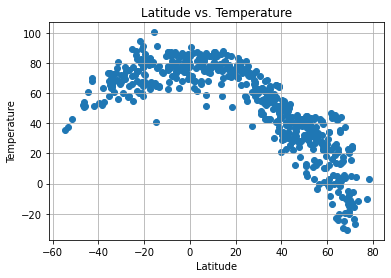

In [8]:
x_values = city_df["Lat"]
y_values = city_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.grid(True)
plt.savefig("Latitude_vs_Temperature.png")
plt.show()


## Latitude vs. Humidity Plot

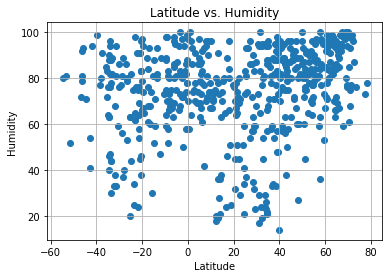

In [9]:
x_values = city_df["Lat"]
y_values = city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.grid(True)
plt.savefig("Images/Latitude_vs_Humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

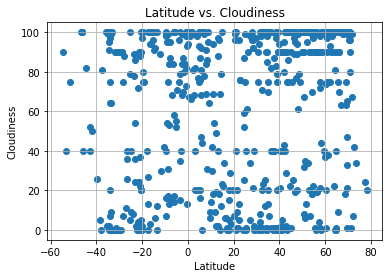

In [10]:
x_values = city_df["Lat"]
y_values = city_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.grid(True)
plt.savefig("Images/Latitude_vs_Cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

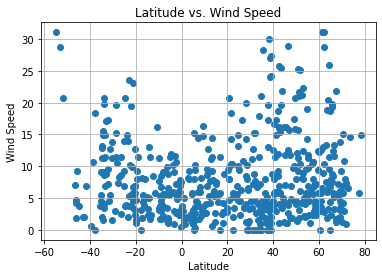

In [11]:
x_values = city_df["Lat"]
y_values = city_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.grid(True)
plt.savefig("Images/Latitude_vs_Wind Speed.png")
plt.show()


## Linear Regression

In [12]:
north_hem= city_df.loc[city_df["Lat"]>=0]

south_hem= city_df.loc[city_df["Lat"]<0]

south_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,avarua,-21.2078,-159.7750,82.45,69,90,5.75,CK,1637552076
6,constitucion,-35.3333,-72.4167,57.88,72,2,9.04,CL,1637551876
8,mataura,-46.1927,168.8643,54.09,81,100,1.92,NZ,1637552079
9,mar del plata,-38.0023,-57.5575,63.55,80,0,0.00,AR,1637552080
11,ushuaia,-54.8000,-68.3000,35.26,80,90,31.07,AR,1637551793


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7873461100497064


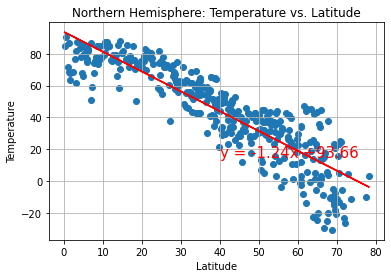

In [13]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Temperature vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("Images/Northern_Hemisphere_Temperature_vs_Latitude.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.38623682089168


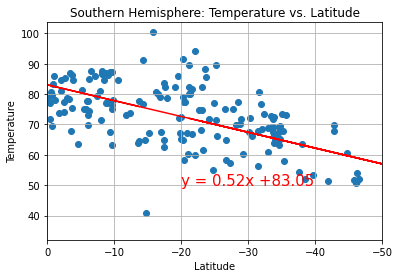

In [14]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.xlim(0,-50)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("Images/Southern_Hemisphere_Temperature_s_Latitude.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09448641312769912


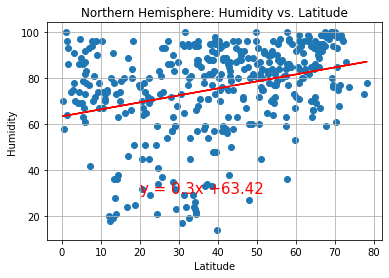

In [15]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Humidity vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("Images/Northern_Hemisphere_Humidity_vs_Latitude.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02664518563389192


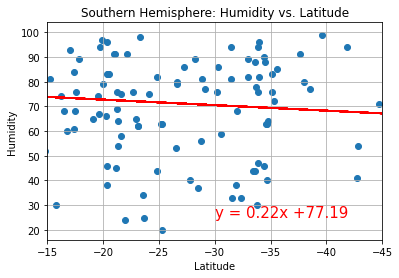

In [16]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.xlim(-15,-45)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("Images/Southern_Hemisphere_Humidity_vs_Latitude.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.030371903530175236


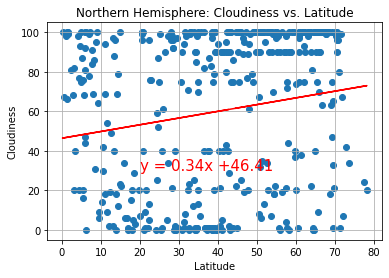

In [17]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("Images/Northern_Hemisphere_Cloudiness_vs_Latitude.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02099003176942441


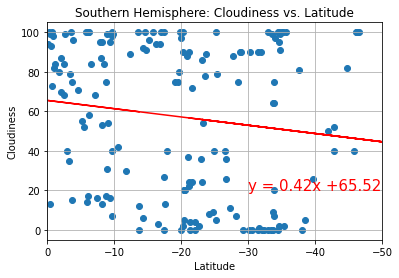

In [18]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.xlim(0,-50)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("Images/Southern_Hemisphere_Cloudiness_vs_Latitude.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.029363427419211573


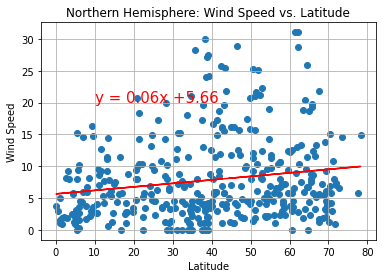

In [19]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("Images/Northern_Hemisphere_Wind_Speed_vs_Latitude.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11437110810439843


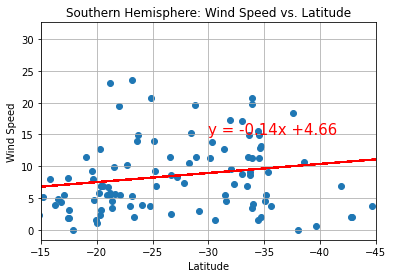

In [20]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.xlim(-15,-45)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("Images/Southern_Hemisphere_Wind_Speed_vs_Latitude.png")
plt.show()
